# Computer Vision Project 2

##### Submitted By : Snehaa Ganesan (sg4860)

For successful implementation, Kindly run the codes one by one in order and give input where prompted 

### Problem 1.1

In [1]:
#Loading libraries that may be used in the future
from PIL import Image
import numpy as np
import scipy as sc
from scipy import signal as sg
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from random import *
import matplotlib.image as mpimg
from skimage import io
from scipy.interpolate import interp1d
import cv2
import math
%matplotlib inline 

In [2]:
#Image Loading function
def loading_image(image):
    img2 = cv2.imread(image,0)
    img = np.asarray(img2)
    I = img
    
    return I

In [3]:
#Transformation matrices and their inverses
def matrices():
    T1 = [(1,0,30),(0,1,30),(0,0,1)]
    T2 = [(1,0,-30),(0,1,-30),(0,0,1)]
    scale = [(2,0,0),(0,2,0),(0,0,1)]
    rota = [(0.7,-0.7,0),(0.7,0.7,0),(0,0,1)]
    shear = [(1,1.2,0),(1.2,1,0),(0,0,1)]


    T11 = np.linalg.tensorinv(T1, ind=1)
    T22 = np.linalg.tensorinv(T2, ind=1)
    scale1 = np.linalg.tensorinv(scale, ind=1)
    rota1 = np.linalg.tensorinv(rota, ind=1)
    shear1 = np.linalg.tensorinv(shear, ind=1)
    
    return T11, T22, scale1, rota1, shear1

In [4]:
#Function that runs separate operations with nearest neighbourhood interpolation
def separate_operations(I,O,T11, T22, scale1, rota1, shear1):
    
        user2 = input("Translation - 0 | Rotation - 1  | Scaling - 2 | Shearing - 3 :   ")
    
        if user2 is 0:
            O1 = nn_translate(I,O,T11)
            plottings(O1)
            
        if user2 is 1:
            O2 = nn_rotate(I,O,rota1)
            plottings(O2)
        
        if user2 is 2:
            O3 = nn_scale(I,O,scale1)
            plottings(O3)
        
        if user2 is 3:
            O4 = nn_shear(I,O,shear1)
            plottings(O4)
    
        

In [5]:
#Function that runs separate operations with bilinear interpolation

def separate_operations2(I,O, T11, T22, scale1, rota1, shear1):
    
        user4 = input("Translation - 0 | Rotation - 1  | Scaling - 2 | Shearing - 3 :   ")
    
        if user4 is 0:
            O5 = bn_translate(I,O,T11)
            plottings(O5)
            
        if user4 is 1:
            O6 = bn_rotate(I,O,rota1)
            plottings(O6)
        
        if user4 is 2:
            O7 = bn_scale(I,O,scale1)
            plottings(O7)
        
        if user4 is 3:
            O8 = bn_shear(I,O,shear1)
            plottings(O8)
    
        

In [6]:
def nn_cascade(I, O, T11, T22, scale1, rota1, shear1):
    
    O11 = np.zeros([I.shape[0], I.shape[1]])
    for x in range(0,O.shape[0]):
        for y in range(0,O.shape[1]):
            
            temp1 = np.matmul(scale1, (np.transpose([x,y,1])))
            #temp2 = np.matmul(shear1, (np.transpose([temp1[0],temp1[1],1])))
            temp3 = np.matmul(rota1, (np.transpose([temp1[0],temp1[1],1])))
            temp4 = np.matmul(T11, (np.transpose([temp3[0],temp3[1],1])))
            
            if(temp3[0]<0 or temp3[1]<0):
                continue
            else:
                newx = temp3[0]
                newy = temp3[1]
                x1 = np.ceil(newx)
                y1 = np.ceil(newy)
                if(x1>=O.shape[0] or y1>=O.shape[1]):
                    continue
                else:
                    O11[x][y] = I[x1][y1]


    cv2.imwrite('nn_cascade.png', O11)
    plottings(O11)
    return O11

In [7]:
def bn_cascade(I, O, T11, T22, scale1, rota1, shear1):
    
    O10 = np.zeros([I.shape[0], I.shape[1]])
    for x in range(0,O.shape[0]):
        for y in range(0,O.shape[1]):
            
            temp1 = np.matmul(scale1, (np.transpose([x,y,1])))
            #temp2 = np.matmul(shear1, (np.transpose([temp1[0],temp1[1],1])))
            temp3 = np.matmul(rota1, (np.transpose([temp1[0],temp1[1],1])))
            temp4 = np.matmul(T11, (np.transpose([temp3[0],temp3[1],1])))
            
            
            if(temp3[0]<0 or temp3[1]<0):
                continue
            else:
                newx = temp3[0]
                newy = temp3[1]
                
                x1 = newx - 1
                y1 = newy - 1
                x2 = newx + 1
                y2 = newy + 1
                
                briness = bilint(x1,y1,x2,y2,newx,newy,I)
                O10[x][y] = briness
    
    cv2.imwrite('bn_cascade.png', O10)
    plottings(O10)
    return O10
 
    
  

In [8]:
#Image display/Plotter function
def plottings(image):
    
    plt.imshow(image, cmap = 'gray')
    
    plt.show()

In [9]:
#nearest neighbour translate function
def nn_translate(I,O,T11):
    
    O1 = np.zeros([I.shape[0], I.shape[1]])
    for x in range(0,O.shape[0]):
        for y in range(0,O.shape[1]):
            temp1 = np.matmul(T11, (np.transpose([x,y,1])))
            
            if(temp1[0]<0 or temp1[1]<0):
                continue
            else:
                newx = temp1[0]
                newy = temp1[1]
                x1 = np.ceil(newx)
                y1 = np.ceil(newy)
                O1[x][y] = I[x1][y1]

    cv2.imwrite('nn_translate.png', O1)
    return O1
   

In [10]:
#nearest neighbour rotate function
def nn_rotate(I,O,rota1):
    O2 = np.zeros([I.shape[0], I.shape[1]])
    for x in range(0,O.shape[0]):
        for y in range(0,O.shape[1]):
            temp1 = np.matmul(rota1, (np.transpose([x,y,1])))
            
            if(temp1[0]<0 or temp1[1]<0):
                continue
            else:
                newx = temp1[0]
                newy = temp1[1]
                x1 = np.ceil(newx)
                y1 = np.ceil(newy)
                if(x1>=O.shape[0] or y1>=O.shape[1]):
                    continue
                else:
                    O2[x][y] = I[x1][y1]

    cv2.imwrite('nn_rotate.png', O2)
    return O2
    

In [11]:
#nearest neighbour scale function
def nn_scale(I,O,scale1):
    O3 = np.zeros([I.shape[0], I.shape[1]])
    for x in range(0,O.shape[0]):
        for y in range(0,O.shape[1]):
            temp1 = np.matmul(scale1, (np.transpose([x,y,1])))
            if(temp1[0]<0 or temp1[1]<0):
                continue
            else:
                newx = temp1[0]
                newy = temp1[1]
                x1 = np.ceil(newx)
                y1 = np.ceil(newy)
                if(x1>=O.shape[0] or y1>=O.shape[1]):
                    continue
                else:
                    O3[x][y] = I[x1][y1]

    cv2.imwrite('nn_scale.png', O3)
    return O3
 

In [12]:
#nearest neighbour shear function
def nn_shear(I,O,shear1):
    O4 = np.zeros([I.shape[0], I.shape[1]])
    for x in range(0,O.shape[0]):
        for y in range(0,O.shape[1]):
            temp1 = np.matmul(shear1, (np.transpose([x,y,1])))
            if(temp1[0]<0 or temp1[1]<0):
                continue
            else:
                newx = temp1[0]
                newy = temp1[1]
                x1 = np.ceil(newx)
                y1 = np.ceil(newy)
                if(x1>=O.shape[0] or y1>=O.shape[1]):
                    continue
                else:
                    O4[x][y] = I[x1][y1]

    cv2.imwrite('nn_shear.png', O4)
    return O4
 

In [13]:
#Bilinear interpolation translate function
def bn_translate(I,O,T11):
    O5 = np.zeros([I.shape[0], I.shape[1]])
    for x in range(0,O.shape[0]):
        for y in range(0,O.shape[1]):
            
            temp1 = np.matmul(T11, (np.transpose([x,y,1])))
            if(temp1[0]<0 or temp1[1]<0):
                continue
            else:
                newx = temp1[0]
                newy = temp1[1]
                
                x1 = newx - 1
                y1 = newy - 1
                x2 = newx + 1
                y2 = newy + 1
                
                briness = bilint(x1,y1,x2,y2,newx,newy,I)
                O5[x][y] = briness

    cv2.imwrite('bn_translate.png', O5)
    return O5
 

In [14]:
#Function computes brightness - returns the computed brighteness as per bilinear interpolation
def bilint(x1,y1,x2,y2,newx,newy,I):
    
    
    d1 = (y2-y1)
    d2 = (x2-x1)
    
    a1 = ((int(y2-newy))*I[x1][y1])/d1
    a2 = ((int(newy-y1))*I[x1][y2])/d1
    b1 = ((int(y2-newy))*I[x2][y1])/d1
    b2 = ((int(newy-y1))*I[x2][y2])/d1
    
   
    
    a = a1+a2
    b = b1+b2
    
    briness = ((x2-newx)*a/(x2-x1)) + ((newx-x1)*b/d2)
    
    
    
    return briness

In [15]:
#Bilinear interpolation rotate function
def bn_rotate(I,O,rota1):
    O6 = np.zeros([I.shape[0], I.shape[1]])
    for x in range(0,O.shape[0]):
        for y in range(0,O.shape[1]):
            temp1 = np.matmul(rota1, (np.transpose([x,y,1])))
            if(temp1[0]<0 or temp1[1]<0):
                continue
            else:
                newx = temp1[0]
                newy = temp1[1]
                
                x1 = newx - 1 
                y1 = newy - 1
                if(newx < I.shape[0]-1):  
                    x2 = newx + 1
                else:
                    x2 = 299
                    
                if(newy < I.shape[1]-1):
                    y2 = newy + 1
                else:
                    y2 = 299
                
                briness = bilint(x1,y1,x2,y2,newx,newy,I)
                O6[x][y] = briness

    cv2.imwrite('bn_rotate.png', O6)
    return O6
   

In [16]:
#Bilinear interpolation scale function
def bn_scale(I,O,scale1):
    O7 = np.zeros([I.shape[0], I.shape[1]])
    for x in range(0,O.shape[0]):
        for y in range(0,O.shape[1]):
            temp1 = np.matmul(scale1, (np.transpose([x,y,1])))
            if(temp1[0]<0 or temp1[1]<0):
                continue
            else:
                newx = temp1[0]
                newy = temp1[1]
                
                x1 = newx - 1
                y1 = newy - 1
                x2 = newx + 1
                y2 = newy + 1
                
                
                briness = bilint(x1,y1,x2,y2,newx,newy,I)
                O7[x][y] = briness

    cv2.imwrite('bn_scale.png', O7)
    return O7
    

In [17]:
#Bilinear interpolation shear function
def bn_shear(I,O,shear1):
    O8 = np.zeros([I.shape[0], I.shape[1]])
    for x in range(0,O.shape[0]):
        for y in range(0,O.shape[1]):
            temp1 = np.matmul(shear1, (np.transpose([x,y,1])))
            if(temp1[0]<0 or temp1[1]<0):
                continue
            else:
                newx = temp1[0]
                newy = temp1[1]
                
                x1 = newx - 1
                y1 = newy - 1
                x2 = newx + 1
                y2 = newy + 1
                
                briness = bilint(x1,y1,x2,y2,newx,newy,I)
                O8[x][y] = briness
    
    cv2.imwrite('bn_shear.png', O8)
    return O8


In [18]:
#Main Function for Problem 1.1
def part1_1():
    I = loading_image("111.jpg")

    T11, T22, scale1, rota1, shear1 = matrices()

    O = np.zeros([I.shape[0], I.shape[1]])

    user = input("Nearest Neighbour - 0 | Bilinear - 1   :   ")

    if user is 0 :

        user1 = input("Separate Operations - 0 | Cascading - 1   :   ")

        if user1 is 0 :

            separate_operations(I,O, T11, T22, scale1, rota1, shear1)    

        if user1 is 1 :
            
            nn_cascade(I,O, T11, T22, scale1, rota1, shear1)

    if user is 1 :

        user3 = input("Separate Operations - 0 | Cascading - 1   :   ")

        if user3 is 0 :

            separate_operations2(I,O,T11, T22, scale1, rota1, shear1) 
        
        if user3 is 1 :
            
            bn_cascade(I,O, T11, T22, scale1, rota1, shear1)



Nearest Neighbour - 0 | Bilinear - 1   :   0
Separate Operations - 0 | Cascading - 1   :   0
Translation - 0 | Rotation - 1  | Scaling - 2 | Shearing - 3 :   0


/Users/snehaaganesan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


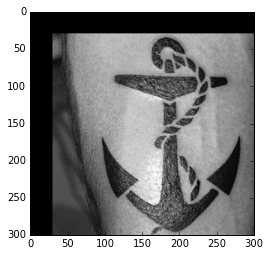

In [19]:
part1_1()

Nearest Neighbour - 0 | Bilinear - 1   :   1
Separate Operations - 0 | Cascading - 1   :   1


/Users/snehaaganesan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/snehaaganesan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/snehaaganesan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/snehaaganesan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


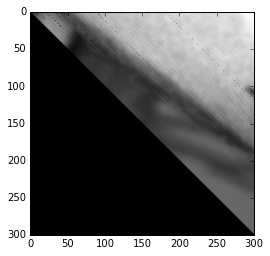

In [20]:
part1_1()

### Problem 1.2

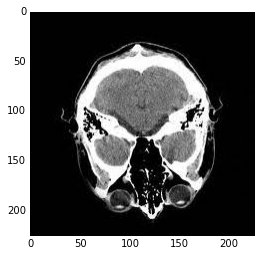

In [21]:
brain2 = loading_image("brain2.jpg")
plottings(brain2)

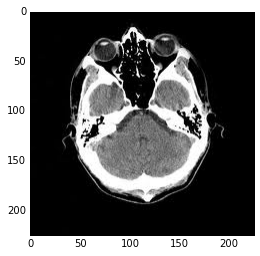

In [22]:
brain1 = loading_image("brain1.jpg")
plottings(brain1)

In [23]:
#Main function of 
def problem1_2():

    L = loading_image("brain2.jpg")
    R = loading_image("brain1.jpg")

    L1 = [[49,108,1,0,0,0],[0,0,0,49,108,1],[178,107,1,0,0,0],[0,0,0,178,107,1],[104,25,1,0,0,0],[0,0,0,104,25,1]]
    R2 = [[180],[107],[46],[112],[123],[200]]

    Affine = np.linalg.solve(L1,R2)

    print Affine
    #Affine = np.matmul(L1,R22)
    
    Affine2 = np.zeros([3,3])
    
    Affine2[0][0] = Affine[0][0]
    Affine2[0][1] = Affine[1][0]
    Affine2[0][2] = Affine[2][0]
    Affine2[1][0] = Affine[3][0]
    Affine2[1][1] = Affine[4][0]
    Affine2[1][2] = Affine[5][0]
    Affine2[2][2] = 1.00
    
    

    output = np.zeros([L.shape[0], L.shape[1]])
    
    for x in range(0,output.shape[0]):
        for y in range(0,output.shape[1]):
            temp1 = np.matmul(Affine2, (np.transpose([x,y,1])))
            
            
            
            if(temp1[0]<0 or temp1[1]<0):
                continue
            else:
                newx = temp1[0]
                newy = temp1[1]
                x1 = np.ceil(newx)
                y1 = np.ceil(newy)
                if(x1>=output.shape[0] or y1>=output.shape[1]):
                    continue
                else:
                    output[x][y] = L[x1][y1]


    cv2.imwrite('landmark_translation.png', output)
    return output
    

    

[[ -1.03877206e+00]
 [ -1.59594442e-03]
 [  2.31072193e+02]
 [  3.02290650e-02]
 [ -1.10045062e+00]
 [  2.24367443e+02]]


/Users/snehaaganesan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


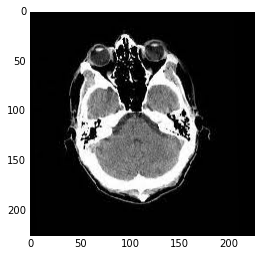

In [24]:
#Result of problem 1.2
output = problem1_2()
plottings(output)

## Problem 2

In [41]:
#This function creates the partial derivate of image (x)
def edge_x(s):

    rows = s.shape[0]
    cols = s.shape[1]
    pic_ex = np.empty([rows,cols], dtype = np.int8 )
    pic_ex_im = np.empty([rows,cols], np.uint8)
    temp1 = np.empty([1, 9])
    
    #1st derivative kernels (in x and y directions)
    ex = [[0,0,0],[-0.5,0,0.5],[0,0,0]]
    ex = np.asarray(ex)
   
    
    
    u1 = cols - 2
    u2 = rows -2
    for i in range(1, u2):
        for j in range(1, u1):
            
           
            #Convolving row wise and saving the corresponding sums in temp1 array
            temp1[0][0] = ex[0][0]*s[i-1][j-1] + ex[0][1]*s[i][j-1] + ex[0][2]*s[i+1][j-1] 
            
            temp1[0][1] = ex[1][0]*s[i-1][j] + ex[1][1]*s[i][j] + ex[1][2]*s[i+1][j] 
            
            temp1[0][2] = ex[2][0]*s[i-1][j+1] + ex[2][1]*s[i][j+1] + ex[2][2]*s[i+1][j+1] 
           
           
           
            #Adding the row wise convolved values (temp1) to get pixel value at the centre
            pic_ex[i][j] = temp1[0][0] + temp1[0][1] + temp1[0][2]
            pic_ex_im[i][j] = temp1[0][0] + temp1[0][1] + temp1[0][2]
      

    return pic_ex, pic_ex_im




In [42]:
#This function creates the partial derivative of image (y)
def edge_y(s):

    rows = s.shape[0]
    cols = s.shape[1]
    pic_ey = np.empty([rows,cols], dtype = np.int8)
    pic_ey_im = np.empty([rows,cols], dtype = np.uint8)
    temp1 = np.empty([1, 9])
    
    #1st derivative kernels (in x and y directions)
    ey = [[0,-0.5,0],[0,0,0],[0,0.5,0]]
    ey = np.asarray(ey)
    

    u1 = cols - 2
    u2 = rows -2
    for i in range(1, u2):
        for j in range(1, u1):
            
            #Convolving row wise and saving the corresponding sums in temp1 array
            temp1[0][0] = ey[0][0]*s[i-1][j-1] + ey[0][1]*s[i][j-1] + ey[0][2]*s[i+1][j-1] 
            
            temp1[0][1] = ey[1][0]*s[i-1][j] + ey[1][1]*s[i][j] + ey[1][2]*s[i+1][j] 
            
            temp1[0][2] = ey[2][0]*s[i-1][j+1] + ey[2][1]*s[i][j+1] + ey[2][2]*s[i+1][j+1] 
           
           
           
            
            #Adding the row wise convolved values (temp1) to get pixel value at the centre
            pic_ey[i][j] = temp1[0][0] + temp1[0][1] + temp1[0][2]
            pic_ey_im[i][j] = temp1[0][0] + temp1[0][1] + temp1[0][2]
      

    return pic_ey, pic_ey_im






In [43]:
#This function produces the edgemap
def EdgeMap(pic_ex,pic_ey):
    assert pic_ex.shape == pic_ey.shape
    output = np.zeros_like(pic_ex)
    output = np.sqrt(np.square(pic_ex) + np.square(pic_ey))
    #output = (output / np.max(output)) * 255
    #output = output.astype(int)
    return output



In [44]:
def edges(output,threshold):
    out = np.zeros_like(output)
    for i in range(0,output.shape[0]-1):
        for j in range(0,output.shape[1]-1):
            
            if output[i][j] > threshold:
                out[i][j] = 255
            else :
                out[i][j] = 0
            
           
   
    return out



In [45]:
def plot(img):
    
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')


    plt.show()

In [46]:
def accumulator(img, edges):
    
    width, height = img.shape
    diag = np.ceil(np.sqrt(width * width + height * height))   # max_dist
    rhos = np.linspace(-diag, diag, diag * 2.0)
    thetas = np.deg2rad(np.arange(0.0, 180.0))
    N = edges.shape[0]
    acc1 = np.zeros((diag,180))
    r2 = []
    t2 = []
    thresh = 60
    N = edges.shape[0]
    for x in range(0,edges.shape[0]-1):
        for y in range(0,edges.shape[1]-1):
            if(edges[x][y]>100):
                for t in range(1,180):
                    cosi1 = np.cos(math.radians(t))
                    sini1 = np.sin(math.radians(t))
                    rho = (x*cosi1) + (y*sini1)
                    #q = rhow(t,rho,N)
                    #q = int(q)
                    rho = int(np.absolute(rho))
                    acc1[rho][t] += 1
                    r2.append(x)
                    t2.append(y)


    return acc1  

In [47]:
def plot_accumulator(acc):

    
    plt.imshow(acc,cmap='gray', aspect='auto')
    plt.show()

In [48]:
#Running the functions for the accumulator matrix
def main(image):
    img = loading_image(image)
    img2 = cv2.GaussianBlur(img,(13,13),0)
    pic_ey, pic_ey_im = edge_y(img2)
    pic_ex, pic_ex_im = edge_x(img2)
    output = EdgeMap(pic_ex,pic_ey)
    edge = edges(output,8)
    acc1 = accumulator(img, edge)
    plot_accumulator(acc1)
    
    return img,acc1

/Users/snehaaganesan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt
/Users/snehaaganesan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


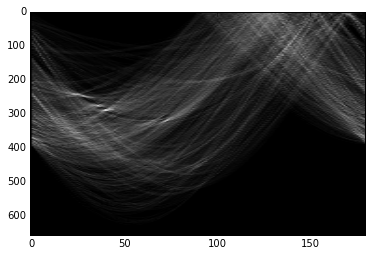

In [51]:
img,acc1 = main("two.png")
#main("")

In [52]:
def smoothing(acc1):
    filter1 = np.ones([3,3], dtype = float)/9
    new_acc= sg.convolve(acc1, filter1, mode='valid')
    return new_acc
    

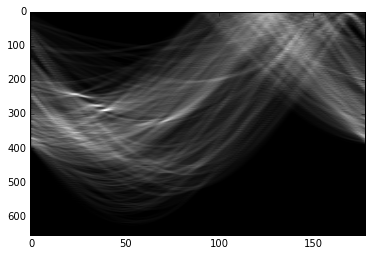

In [53]:
new_acc = smoothing(acc1)
cv2.imwrite('hough_aftersmoothing.png', new_acc)
plot_accumulator(new_acc)

In [54]:
a = []

def peakdetection(new_acc):
    
    final = np.copy(new_acc)
    for i in range(0,new_acc.shape[0]-1):
        for j in range(0,new_acc.shape[1]-1):
            n1 = new_acc[i][j-1]
            n2 = new_acc[i][j+1]
            n3 = new_acc[i-1][j]
            n4 = new_acc[i+1][j]
            d1 = new_acc[i-1][j-1]
            d2 = new_acc[i+1][j+1]
            d3 = new_acc[i-1][j+1]
            d4 = new_acc[i+1][j-1]
            
            if(new_acc[i][j]>=n1 and new_acc[i][j]>=n2 and new_acc[i][j]>=n3 and new_acc[i][j]>=n4 and 
               new_acc[i][j]>=d1 and new_acc[i][j]>=d2 and new_acc[i][j]>=d3 and new_acc[i][j]>=d4):
               
                continue
                
           
            else:
                
                a.append((i,j))
            
    for point in a:
        
        final[point[0],point[1]]=0
        
    return final, a
    

In [55]:

new_acc2,a = peakdetection(new_acc)
for i in range(0,new_acc2.shape[0]-1):
        for j in range(0,new_acc2.shape[1]-1):
            if(new_acc2[i][j]>92):
                continue
            else:
                new_acc2[i][j] = 0
peaks=[]
for row in range(new_acc2.shape[0]):
        for col in range(new_acc2.shape[1]):
            if(new_acc2[row][col]>0):
                peaks.append((row,col))





In [56]:
def drawlines(wheres,image):
    for b in wheres:
        r = b[0]
        t = b[1]
        ss = math.sin(math.radians(t))
        cs = math.cos(math.radians(t))
        if t != 0:
            y1 = int(r/ss)
            y2 = int((r - image.shape[0]*cs)/ss)
            cv2.line(image,(y1,0),(y2,image.shape[0]),(0,255,2),3)
    return image

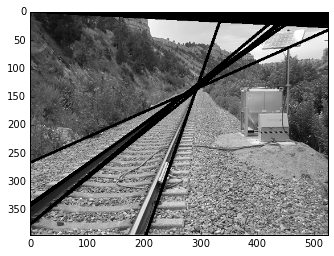

In [58]:
img = loading_image("two.png")

img = drawlines(peaks,img)
cv2.imwrite('lines_detected.png', img)
plt.imshow(img,cmap='gray')
    
    
plt.show()

## The End